In [25]:
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve_nsga2, calculate_route_distance

In [26]:
distance_df = pd.read_csv(r'C:\Users\ASUS\mTSP\data\HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [27]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    print(f"⚠️ Không phát hiện hội tụ sớm — thuật toán chạy đủ {len(generation_fitness)} thế hệ.")
    return len(generation_fitness)



=== Số người (m) = 1 ===
⚠️ Không phát hiện hội tụ sớm — thuật toán chạy đủ 500 thế hệ.
Tổng quãng đường: 1565.71
Tuyến dài nhất: 1565.71
Chênh lệch tuyến (Balance): 0.00
Thời gian thực thi: 24.0382 giây
Số vòng lặp để hội tụ: 500
Tốc độ hội tụ: 20.8002 đơn vị/gen
 - Tuyến 1 (1565.71): [0, 51, 45, 67, 107, 61, 22, 115, 79, 98, 80, 71, 46, 105, 19, 94, 110, 93, 82, 95, 10, 16, 55, 99, 20, 9, 31, 34, 49, 90, 114, 5, 88, 41, 59, 17, 42, 66, 25, 116, 87, 76, 81, 47, 106, 57, 109, 103, 21, 3, 33, 2, 75, 86, 123, 44, 8, 23, 50, 119, 97, 70, 101, 26, 102, 43, 24, 112, 122, 11, 28, 89, 14, 35, 18, 65, 54, 52, 32, 125, 1, 120, 73, 30, 69, 72, 100, 126, 85, 7, 62, 39, 84, 74, 77, 38, 111, 113, 58, 36, 118, 6, 64, 15, 83, 108, 104, 96, 63, 124, 40, 121, 27, 92, 117, 29, 48, 4, 13, 60, 56, 37, 91, 68, 12, 78, 53, 0]


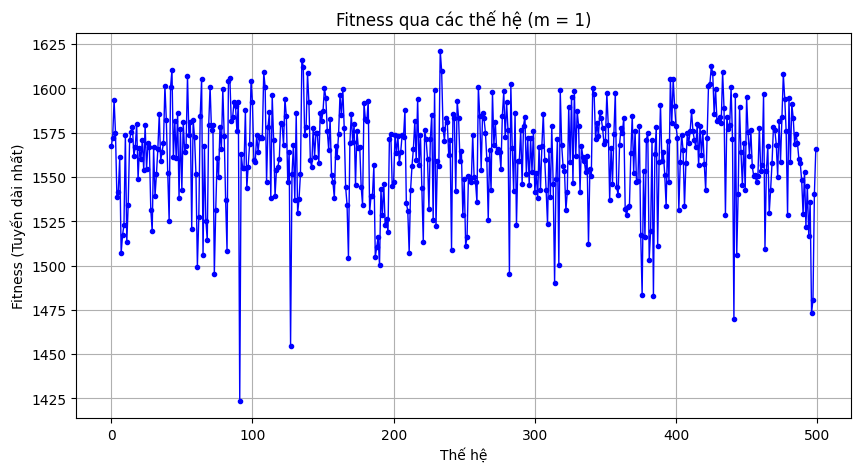


=== Số người (m) = 2 ===
⚠️ Không phát hiện hội tụ sớm — thuật toán chạy đủ 500 thế hệ.
Tổng quãng đường: 1608.43
Tuyến dài nhất: 808.96
Chênh lệch tuyến (Balance): 4.74
Thời gian thực thi: 32.0775 giây
Số vòng lặp để hội tụ: 500
Tốc độ hội tụ: 15.5872 đơn vị/gen
 - Tuyến 1 (799.47): [0, 114, 53, 39, 79, 26, 43, 105, 58, 60, 121, 11, 50, 10, 111, 102, 118, 106, 3, 52, 98, 59, 2, 4, 29, 61, 41, 20, 14, 8, 49, 78, 107, 87, 68, 104, 25, 126, 40, 75, 71, 110, 70, 5, 86, 48, 35, 103, 80, 122, 17, 91, 89, 45, 6, 12, 119, 115, 56, 95, 124, 33, 62, 112, 0]
 - Tuyến 2 (808.96): [0, 24, 18, 108, 81, 64, 72, 57, 92, 9, 116, 109, 69, 74, 38, 123, 94, 19, 82, 22, 93, 101, 77, 27, 32, 125, 73, 63, 85, 100, 117, 46, 96, 7, 34, 13, 65, 90, 31, 83, 55, 76, 1, 23, 47, 44, 21, 88, 67, 28, 97, 36, 42, 84, 30, 37, 99, 51, 54, 15, 66, 16, 120, 113, 0]


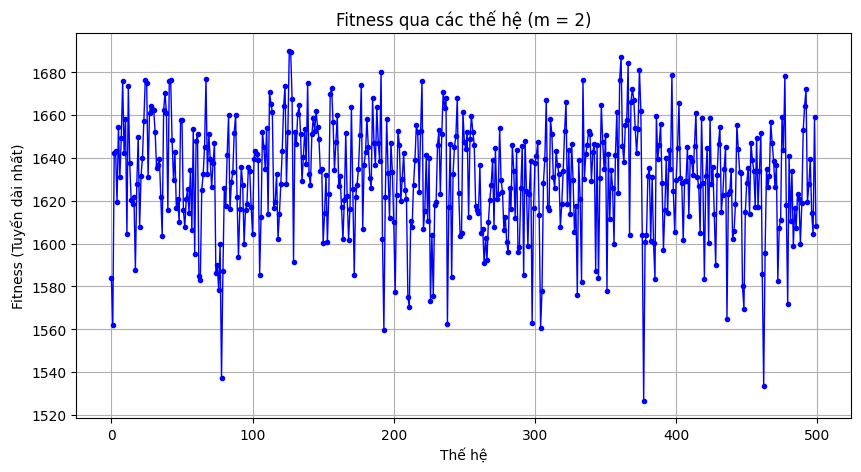


=== Số người (m) = 3 ===
⚠️ Không phát hiện hội tụ sớm — thuật toán chạy đủ 500 thế hệ.
Tổng quãng đường: 1743.95
Tuyến dài nhất: 585.69
Chênh lệch tuyến (Balance): 3.29
Thời gian thực thi: 20.6127 giây
Số vòng lặp để hội tụ: 500
Tốc độ hội tụ: 24.2569 đơn vị/gen
 - Tuyến 1 (577.75): [0, 74, 28, 115, 73, 91, 98, 89, 27, 44, 4, 35, 117, 56, 63, 105, 51, 53, 126, 119, 83, 71, 32, 62, 60, 75, 25, 86, 42, 58, 9, 90, 125, 3, 102, 48, 21, 69, 20, 6, 2, 96, 55, 0]
 - Tuyến 2 (580.51): [0, 46, 15, 18, 40, 16, 36, 88, 103, 65, 45, 39, 66, 113, 41, 17, 33, 122, 37, 85, 59, 24, 114, 26, 100, 70, 80, 104, 93, 7, 61, 23, 31, 52, 72, 94, 50, 109, 84, 95, 101, 67, 11, 0]
 - Tuyến 3 (585.69): [0, 82, 124, 54, 87, 97, 30, 43, 120, 107, 19, 79, 8, 14, 81, 49, 116, 10, 38, 76, 111, 57, 108, 22, 47, 64, 78, 121, 1, 110, 118, 12, 92, 68, 99, 5, 29, 34, 77, 112, 13, 106, 123, 0]


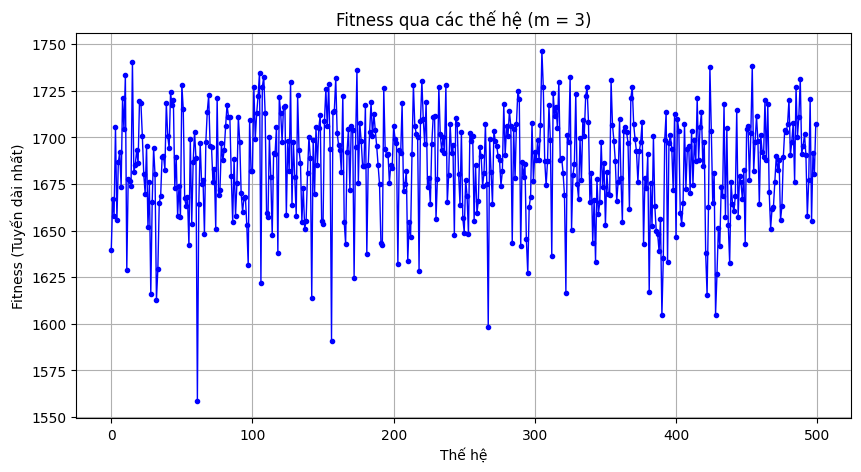

In [29]:
for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")
    total_fitness, balance, routes, fitness_gen, exec_time, gen_ran = solve_nsga2(distance_matrix, m, generations=500)
    total_distance = sum(calculate_route_distance([0] + r + [0], distance_matrix) for r in routes)
    converged_at = detect_convergence(fitness_gen)
    convergence_speed = converged_at / exec_time if exec_time > 0 else 0

    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất: {total_fitness:.2f}")
    print(f"Chênh lệch tuyến (Balance): {balance:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_at}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")
    for i, r in enumerate(routes):
        route_distance = calculate_route_distance([0] + r + [0], distance_matrix)
        print(f" - Tuyến {i+1} ({route_distance:.2f}): {[0] + r + [0]}")

    # Trực quan hóa cho mỗi m
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_gen, 'bo-', linewidth=1, markersize=3)
    plt.title(f'Fitness qua các thế hệ (m = {m})')
    plt.xlabel('Thế hệ')
    plt.ylabel('Fitness (Tuyến dài nhất)')
    plt.grid(True)
    plt.show()


NSGA-II không phải là lựa chọn tối ưu cho bài toán mTSP.
1. Tính bất ổn định cao: Tất cả 3 biểu đồ đều cho thấy dao động mạnh và không có xu hướng hội tụ rõ ràng
2. Tốc độ hội tụ chậm: Sau 500 thế hệ vẫn chưa đạt được trạng thái ổn định
3. NSGA-II được thiết kế cho đa mục tiêu, nhưng mTSP có cấu trúc đặc biệt